**[Dataset Used Car Auction Prices from Kaggle](https://www.kaggle.com/datasets/tunguz/used-car-auction-prices)**

The dataset contains historical car auction sale prices taken from external internet sources. The data was collected in 2015 and has not been updated anymore.

In this work, an analysis of sales data for used cars as of 2015 will be conducted. Models will be trained to predict the selling price based on the available characteristics.

# Exploratory Data Analysis (EDA) and Data Preparation for Used Car Sales Analysis

In this notebook, I am going to conduct an exploratory analysis of sales data for used cars. I will start by displaying a few rows to familiarize myself with the data representation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [ ]:
df.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
478769,2010,Toyota,RAV4,Limited,suv,automatic,jtmdf4dv0a5028382,mo,4.3,50166.0,silver,gray,tamaroff leasing co,16250,17000,Tue Jun 02 2015 04:00:00 GMT-0700 (PDT)
317230,2013,Chevrolet,Camaro,LS,Coupe,manual,2g1fe1e35d9205290,mi,4.9,7281.0,blue,black,remarketing by ge/michigan schools & govt cu,16700,18000,Thu Feb 19 2015 01:30:00 GMT-0800 (PST)
180877,2013,Toyota,Sienna,LE 7-Passenger Mobility Auto Access,Minivan,automatic,5tdkk3dc6ds357615,ca,3.1,42520.0,gray,gray,avis rac/san leandro,18500,20200,Wed Jan 21 2015 04:30:00 GMT-0800 (PST)
110999,2012,Chevrolet,Impala,LTZ,Sedan,automatic,2g1wc5e38c1281466,ca,2.5,65687.0,gold,black,the hertz corporation,9650,9500,Wed Feb 11 2015 04:30:00 GMT-0800 (PST)
35117,2014,Chevrolet,Cruze,LS,Sedan,automatic,1g1pa5sh2e7194436,in,4.1,9382.0,black,gray,gm financial,11950,11300,Thu Dec 18 2014 10:10:00 GMT-0800 (PST)


I am going to proceed to examine the data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


* year - the year of the car's manufacture
* make - the car's brand
* model - the car's model
* trim - the car's trim level
* body - the car's body type
* transmission - the car's transmission type
* vin - the car's identification number
* state - the state where the auction took place
* condition - the condition of the cars at the time of the auction
* odometer -  the distance traveled by the car since its manufacture
* color - the car's exterior color
* interior - the car's interior color
* seller - the seller of the car, including dealerships
* mmr - the market evaluation price of the cars
* sellingprice - the price at which the car was sold at auction
* saledate - the date of the car's sale


In [ ]:
df.nunique(axis=0)

year                34
make                96
model              973
trim              1975
body                86
transmission         2
vin             550296
state               38
condition           41
odometer        172277
color               20
interior            17
seller           14264
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

In [ ]:
#removing unnecessary columns

skip_labels = ['make', 'model', 'trim', 'body', 'seller', 'year']
df= df.drop(labels = skip_labels, axis=1)


In [ ]:
#checking for null values
df.isnull().sum()

transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
#deleting rows with undefined values
df=df.dropna()
df

,transmission,vin,state,condition,odometer,color,interior,mmr,sellingprice,saledate
0,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...
558805,automatic,wbafr1c53bc744672,fl,3.9,66403.0,white,brown,20300,22800,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558807,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
#searching for duplicate vins
df[df.duplicated('vin')]

,transmission,vin,state,condition,odometer,color,interior,mmr,sellingprice,saledate
29270,automatic,jnrar05y4xw049475,ca,2.0,188185.0,silver,beige,1925,1100,Thu Jan 29 2015 04:00:00 GMT-0800 (PST)
33326,automatic,5npec4ab7dh504364,pa,2.8,32000.0,gray,—,12150,9800,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT)
40505,automatic,3c4fy58834t214497,fl,1.6,82259.0,beige,black,2200,800,Thu Dec 18 2014 09:35:00 GMT-0800 (PST)
44068,automatic,2g1wd5em7a1256996,ca,3.5,99045.0,white,gray,3450,5500,Tue Dec 30 2014 16:00:00 GMT-0800 (PST)
44863,automatic,1ftpw14v89ka34567,oh,4.2,84515.0,gray,gray,17150,18200,Tue Dec 30 2014 10:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...
558711,automatic,1j4ga69109l752295,nv,3.7,70423.0,white,black,23100,17500,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)
558712,automatic,1ftsw21rx8ea22277,nv,3.3,125628.0,black,beige,21000,18700,Fri Jun 19 2015 04:45:00 GMT-0700 (PDT)
558724,automatic,1g8zs57n17f246542,ga,2.9,82083.0,—,beige,5450,5200,Tue Jun 23 2015 06:00:00 GMT-0700 (PDT)
558774,manual,kndjt2a57c7424577,nv,2.8,53607.0,silver,black,7825,8000,Fri Jul 03 2015 09:00:00 GMT-0700 (PDT)


There are several thousand duplicates, which is quite significant.

In [ ]:
#vin jnrar05y4xw049475
df[df.vin == 'jnrar05y4xw049475']

,transmission,vin,state,condition,odometer,color,interior,mmr,sellingprice,saledate
5105,automatic,jnrar05y4xw049475,ca,2.8,1.0,silver,beige,3675,350,Tue Dec 30 2014 13:00:00 GMT-0800 (PST)
29270,automatic,jnrar05y4xw049475,ca,2.0,188185.0,silver,beige,1925,1100,Thu Jan 29 2015 04:00:00 GMT-0800 (PST)


In [ ]:
#vin 5npec4ab7dh504364
df[df.vin == '5npec4ab7dh504364']

,transmission,vin,state,condition,odometer,color,interior,mmr,sellingprice,saledate
33235,automatic,5npec4ab7dh504364,pa,3.8,32325.0,gray,gray,13800,13500,Fri Dec 19 2014 09:00:00 GMT-0800 (PST)
33326,automatic,5npec4ab7dh504364,pa,2.8,32000.0,gray,—,12150,9800,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT)


In [ ]:
#vin 1j4ga69109l752295
df[df.vin == '1j4ga69109l752295']

,transmission,vin,state,condition,odometer,color,interior,mmr,sellingprice,saledate
470372,automatic,1j4ga69109l752295,ca,3.7,70171.0,white,black,23600,17750,Wed Jun 03 2015 05:15:00 GMT-0700 (PDT)
558711,automatic,1j4ga69109l752295,nv,3.7,70423.0,white,black,23100,17500,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)


 it becomes clear that the same car was resold. Over time, the mileage and condition of the car change, and the price decreases. Therefore, duplicates can be considered as separate cars due to their different characteristics and prices.

In [ ]:
#deleting the vin and saledate column, because they were needed for analysis for duplicates
df=df.drop(labels=['vin','saledate'], axis=1)


I am going  study the descriptive statistics

In [ ]:
df.describe()

,condition,odometer,mmr,sellingprice
count,482966.000000,482966.000000,482966.000000,482966.000000
mean,3.414378,67718.523509,13733.827226,13588.866548
std,0.946916,52597.409365,9591.109085,9669.367601
min,1.000000,1.000000,25.000000,1.000000
25%,2.700000,28456.000000,7225.000000,7000.000000
50%,3.600000,52175.000000,12200.000000,12100.000000
75%,4.200000,98118.000000,18200.000000,18100.000000
max,5.000000,999999.000000,182000.000000,230000.000000


"Between the 75th percentile and the maximum, a significant price gap is visible.

A histogram can be used to visualize the point at which outliers begin.

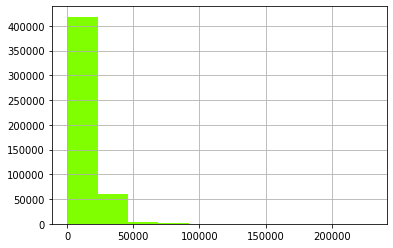

In [ ]:
df['sellingprice'].hist(color='chartreuse')

Cars with a price above approximately $40,000 are sold much less frequently than all others.

Additionally, I am going to create a box plot.

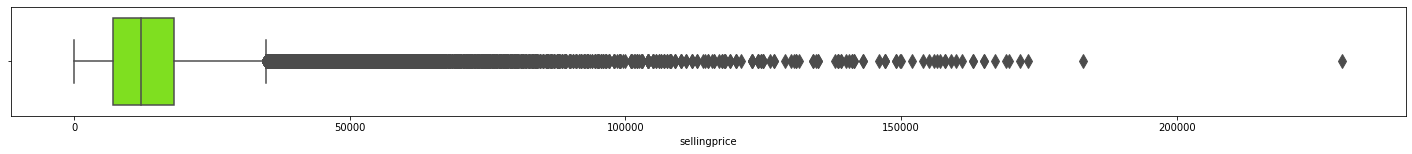

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(x=df['sellingprice'],fliersize=10,color='chartreuse')

Outliers begin at prices above $40,000, so I will set a limit at 50,000.

I am going to move on to the analysis of mileage. Let's examine the histogram.

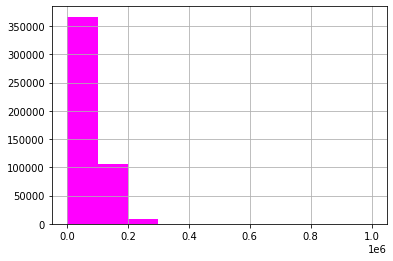

In [ ]:
df['odometer'].hist(color='fuchsia')

Let's display a box plot.

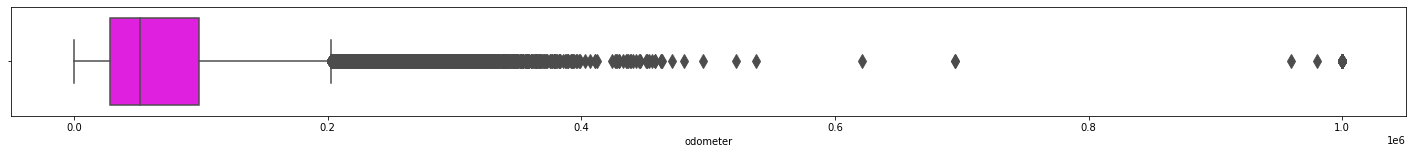

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(x=df['odometer'],fliersize=10,color='fuchsia')

It is appropriate to set a limit at 300,000 miles.

Similarly, I will create a histogram for market evaluation.

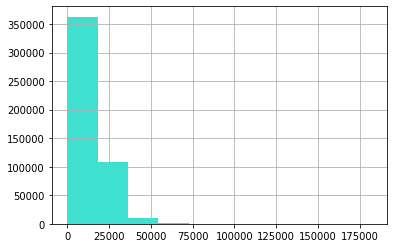

In [ ]:
df['mmr'].hist(color="turquoise")

Let's display a box plot.

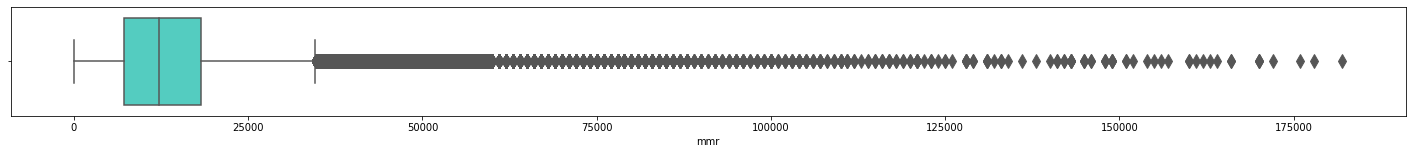

In [ ]:
plt.figure(figsize=(25,2))
sns.boxplot(x=df['mmr'],fliersize=10,color='turquoise')

Like the selling price, the market evaluation should be limited to $50,000.

In [ ]:
#удаляю выбросы
df_len = len(df)
df = df.loc[df['mmr'] <= 50000]
df = df.loc[df['odometer'] <= 300000]
df = df.loc[df['sellingprice'] <= 50000]
df.reset_index(inplace=True, drop=True)
(df_len-df.shape[0])/df_len

0.007971575638864848

When converted to percentages, it is evident that 0.8% of the data has been removed.

In [ ]:
#outputing statistics for non-numeric features.
df.describe(include=['object', 'bool'])

,transmission,state,color,interior
count,479116,479116,479116,479116
unique,2,34,20,17
top,automatic,fl,black,black
freq,462298,76098,93893,211037


In [ ]:
df.transmission.value_counts()

automatic    462298
manual        16818
Name: transmission, dtype: int64

I am going to create a graph with the number of values in the categories - manual and automatic transmission.

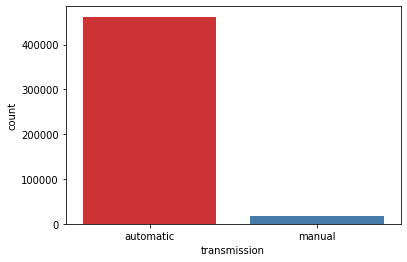

In [ ]:
fig=plt.figure()
sns.countplot(x=df['transmission'], palette = "Set1")

It may seem that there are fewer cars with manual transmission, but it is not necessary to be an expert to know that the transmission type predictably affects the price, so I will not remove this feature for now.


I am going to analyze sales by state.

In [ ]:
df.state.value_counts()

fl    76098
ca    66896
tx    42225
ga    31441
pa    24502
nj    23224
il    21745
oh    20387
tn    19293
nc    19272
mo    15518
mi    14396
nv    11819
md    10113
va     9732
wi     9319
mn     8760
az     7778
wa     7182
ma     6382
co     6346
ny     4844
in     3925
sc     3857
ne     3743
pr     2487
la     1778
ut     1762
ms     1755
hi     1225
or     1061
nm      168
ok       57
al       26
Name: state, dtype: int64

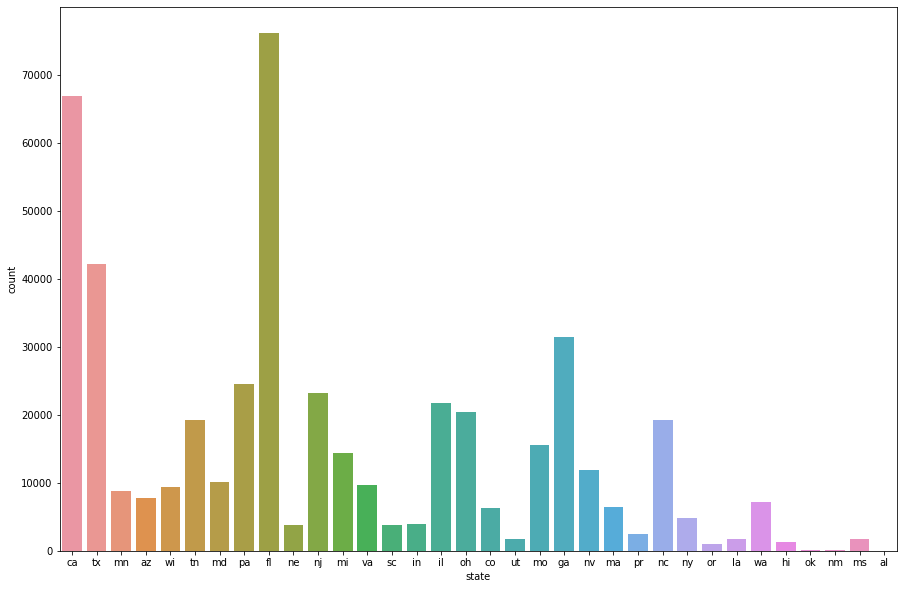

In [ ]:
fig=plt.figure(figsize=(15, 10))
sns.countplot(x=df['state'])

On the graph, it is evident that in some states, the market is not well-established, with very few sales.

In [ ]:
#excluding states with low sales
threshold = df.state.value_counts().mean()
value_counts = df['state'].value_counts()
to_remove = value_counts[value_counts<=threshold].index
df['state'].replace(to_remove, np.nan, inplace=True)


In [ ]:
df = df.dropna()

In [ ]:
#number of rows and columns
df.shape

(378374, 8)

Изучу продажи в разрезе цвета кузова.

In [ ]:
df.color.value_counts()

black        75005
white        71610
gray         55810
silver       55043
blue         33482
red          29857
—            19426
gold          7609
green         7069
beige         5566
burgundy      5527
brown         4315
orange        1369
purple        1003
off-white      937
yellow         834
charcoal       362
turquoise      138
pink            27
lime             8
Name: color, dtype: int64

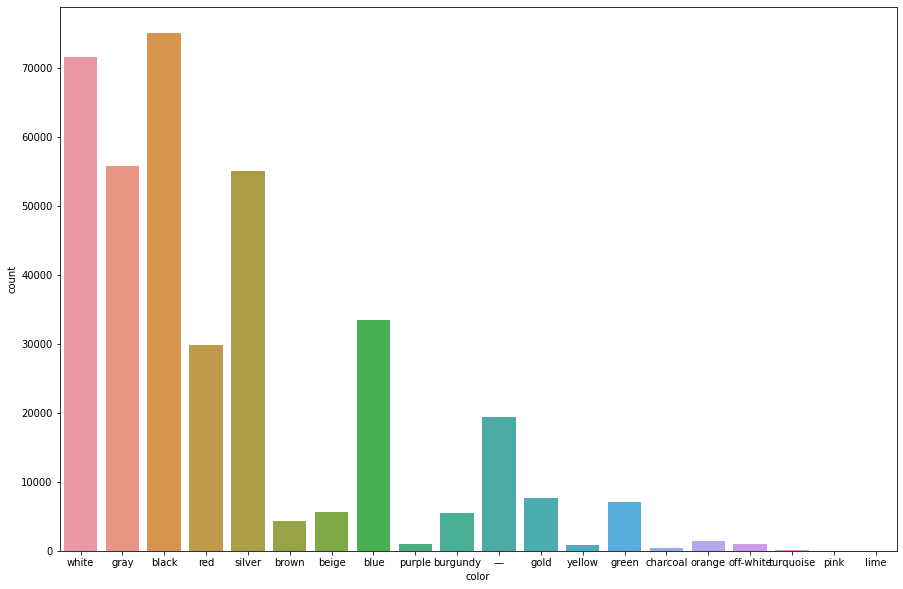

In [ ]:
fig=plt.figure(figsize=(15, 10))
sns.countplot(x=df['color'])

In the US market, rare car colors are encountered, but due to this rarity, there is not enough historical sales data to judge how exactly a rare color affects sales.

In [ ]:
#исключу машины с редкими цветами кузова
threshold = df.color.value_counts().mean()
value_counts = df['color'].value_counts()
to_remove = value_counts[value_counts<=threshold].index
df['color'].replace(to_remove, np.nan, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.color.value_counts()

black     75005
white     71610
gray      55810
silver    55043
blue      33482
red       29857
—         19426
Name: color, dtype: int64

In [ ]:
#deleting rows without body color specified as it does not carry much information
df = df.loc[df.color != '—']

In [ ]:
df.shape

(320807, 8)

I am going to examine sales based on the interior color.

In [ ]:
df['interior'].value_counts()

black        148084
gray         106247
beige         30706
tan           20963
—              7171
brown          4253
silver          911
red             833
blue            703
purple          199
off-white       196
white           139
green           117
gold            115
burgundy        104
orange           62
yellow            4
Name: interior, dtype: int64

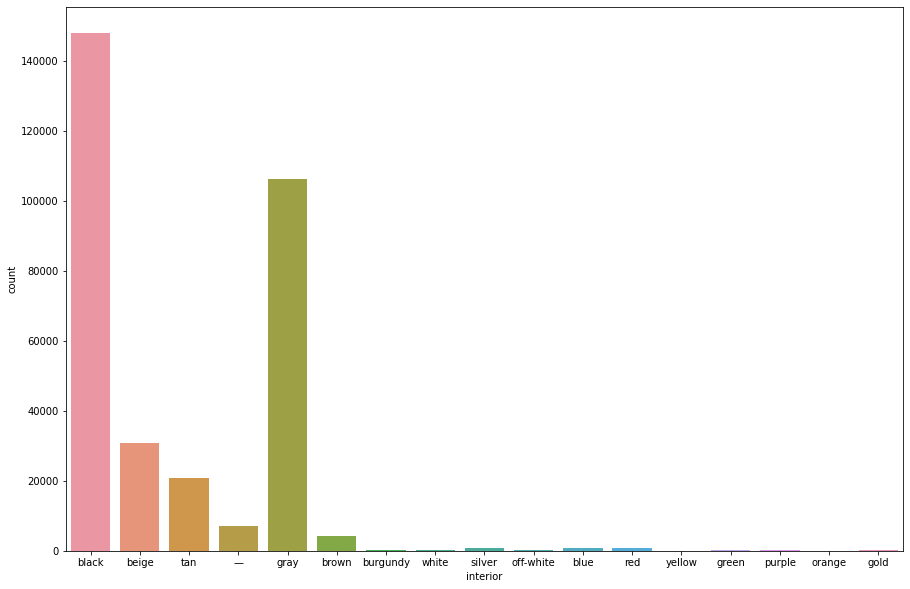

In [ ]:
fig=plt.figure(figsize=(15, 10))
sns.countplot(x=df['interior'])

There is very little data on sales of rarely occurring interior colors compared to classics like black, beige, and gray.

In [ ]:
#excluding rarely occurring interior colors
threshold = df.interior.value_counts().mean()
value_counts = df['interior'].value_counts()
to_remove = value_counts[value_counts<=threshold].index
df['interior'].replace(to_remove, np.nan, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(306000, 8)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.nunique(axis=0)

transmission         2
state               12
condition           41
odometer        133456
color                6
interior             4
mmr                900
sellingprice      1237
dtype: int64

Let's create a heatmap.

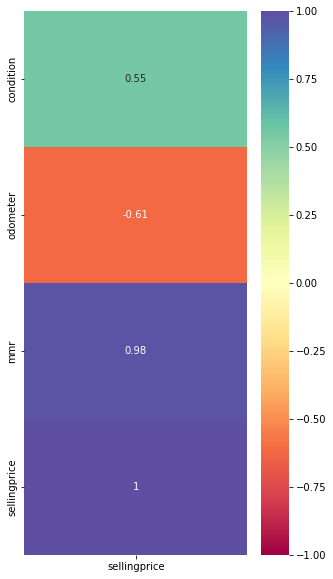

In [ ]:
plt.figure(figsize=(5, 10))
sns.heatmap(df.corr()[['sellingprice']], cmap="Spectral", vmin=-1, vmax=1, annot=True);

It is visually evident that the good condition of the car is directly proportional to the price, while the mileage is inversely proportional to the price.

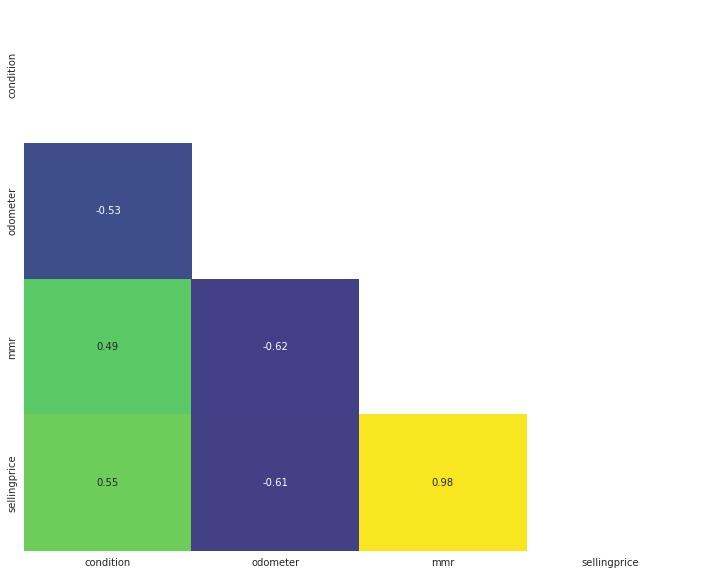

In [ ]:
#correlation
sns.set_style('white')
plt.figure(figsize = (12,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot = True, fmt='.2g', mask=matrix, vmin=-1,
            vmax=1, center= 0, cmap= 'viridis', cbar=False)

The condition of the car has a slightly greater impact on the selling price than on the evaluation price.

#Data preparation for Machine Learning (ML)


In [ ]:
#spliting the data into X and Y
X = df.drop(columns='sellingprice')
X['transmission'] = X['transmission'].map({'automatic':1, 'manual':0})
X = pd.get_dummies(X)
y = df['sellingprice']

X.sample(2)

,transmission,condition,odometer,mmr,state_ca,state_fl,state_ga,state_il,state_mi,state_mo,state_nc,state_nj,state_oh,state_pa,state_tn,state_tx,color_black,color_blue,color_gray,color_red,color_silver,color_white,interior_beige,interior_black,interior_gray,interior_tan
11671,1,4.2,15854.0,16900,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
112426,1,3.0,51414.0,9375,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

sample_X, sample_y = X.head(), y.head()
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(labels=range(5)),
    y.drop(labels=range(5)), test_size = 0.2,
    random_state = 1)


print(X_train.shape)
print(X_test.shape)

(244796, 26)
(61199, 26)


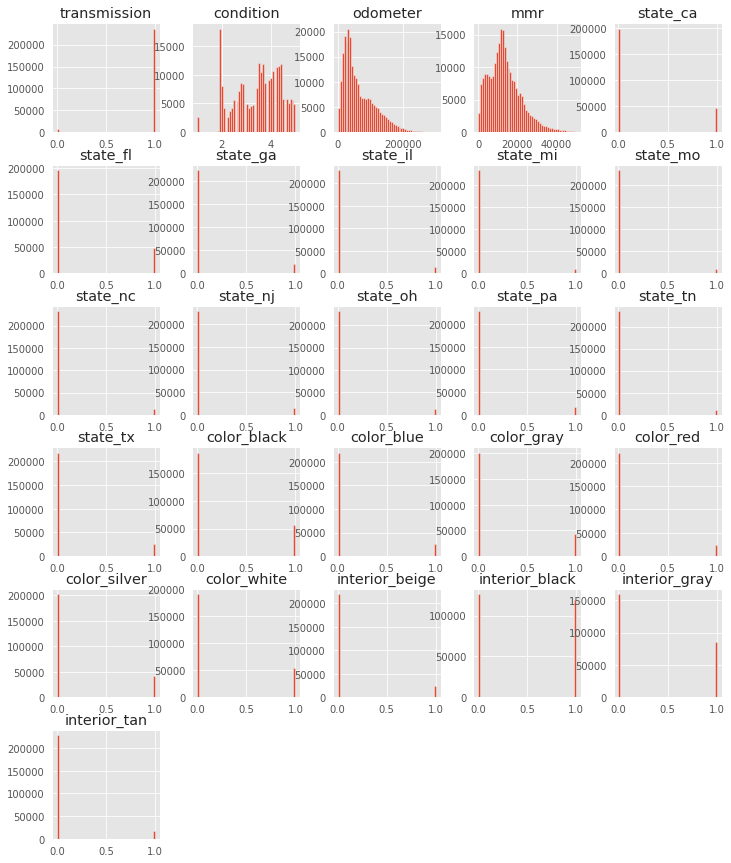

In [ ]:
plt.style.use('ggplot')
X_train.hist(bins = 50, figsize = (12,15))
plt.show()

The distribution of the evaluation price is close to a normal distribution.

#Sklearn. Linear Regression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train) #fitting the model to the data
lin_y_pred=reg.predict(X_test) #price forecast for X_test

In [ ]:
print ('Accuracy of linear regression:')
crossl = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 4,verbose = 0)
msel = mean_squared_error(y_test, lin_y_pred)
rmsel = mean_squared_error(y_test, lin_y_pred)**0.5
mael = mean_absolute_error(y_test, lin_y_pred)
r2l = r2_score(y_test, lin_y_pred)
print('Cross val     : ',crossl)
print('R2            : ', r2l)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')

Точность линейной регрессии:
Cross val     :  [0.97085029 0.96997451 0.97048817 0.96876421]
R2            :  0.969108381063458
MAE           :  960.6165511265082
MSE (RMSE)    :  2225187.403582424  ( 1491.7062055185077 )


In [ ]:
#conclusion
sample_pred = reg.predict(sample_X)

for i in range(5):
  print('Case ', i+1)
  print('Predicted price:')
  print(sample_pred[i].round(2))
  print('Real price:')
  print(sample_y.iloc[i])
  print()

Case  1
Predicted price:
21577.85
Real price:
21500

Case  2
Predicted price:
21885.58
Real price:
21500

Case  3
Predicted price:
31883.27
Real price:
30000

Case  4
Predicted price:
27446.81
Real price:
27750

Case  5
Predicted price:
12724.77
Real price:
10900



#Sklearn. Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Training will take some time on an ensemble of 100 trees.

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train) #fitting the model to the data
rf_pre =rf.predict(X_test) #price forecast for X_test

In [ ]:
print('Accuracy of random forest: ')
crossr = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 4,verbose = 0)
mser = mean_squared_error(y_test, rf_pre)
rmser = mean_squared_error(y_test, rf_pre)**0.5
maer = mean_absolute_error(y_test, rf_pre)
r2r = r2_score(y_test, rf_pre)

print('Cross val     : ', crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser, '(',rmser,')')


Точность случайного леса: 
Cross val     :  [0.97097615 0.97016357 0.97104519 0.96946687]
R2            :  0.9694983901254134
MAE           :  963.190507221173
MSE (RMSE)    :  2197094.2416886124 ( 1482.2598428374872 )


In [ ]:
sample_pred = rf.predict(sample_X)

for i in range(5):
  print('Case ', i+1)
  print('Predicted price:')
  print(sample_pred[i].round(2))
  print('Real price:')
  print(sample_y.iloc[i])
  print()

Case  1
Predicted price:
21228.0
Real price:
21500

Case  2
Predicted price:
22669.5
Real price:
21500

Case  3
Predicted price:
32095.0
Real price:
30000

Case  4
Predicted price:
26742.5
Real price:
27750

Case  5
Predicted price:
10248.0
Real price:
10900



#Sklearn Result


Accuracy of Linear Regression

- Cross val     :  [0.97085029 0.96997451 0.97048817 0.96876421]
- R2            :  0.969108381063458
- MAE           :  960.6165511265082
- MSE (RMSE)    :  2225187.403582424  ( 1491.7062055185077 )

Accuracy of Random Forest

- Cross val     :  [0.97097615 0.97016357 0.97104519 0.96946687]
- R2            :  0.9694983901254134
- MAE           :  963.190507221173
- MSE (RMSE)    :  2197094.2416886124 ( 1482.2598428374872 )

**Conclusion**

Good results were shown by the linear regression and random forest algorithms out of the two models considered. Despite the mean absolute error (MAE) being lower for linear regression, the slightly more significant overall quality indicator (R2) was found for the random forest. The best model is the random forest